Ecopetrol - Color.svg

# **Prueba de Ciencia de Datos**

## **Contexto de negocio**
Una entidad financiera tiene unas reglas de negocio bastante estrictas para la entrega de tarjetas de crédito, por lo que en la actualidad está rechazando gran cantidad de clientes, situación que está afectando las metas del área comercial.

La empresa necesita construir un modelo predictivo que permita estimar la probabilidad de que un cliente pagué o no un crédito.

Se les hace entrega de un archivo train.parquet con información histórica de los clientes que han sido aprobados y la clasificación de su comportamiento de pago en los 6 meses posterior a la entrega de la tarjeta, marcando como malo si presentó mora mayor a 60 días, y bueno en el caso contrario. Se trata de data estructurada tabular donde cada fila representa un crédito, y cada columna una variable característica del crédito, con una columna particular final que indica si el crédito presentó problemas de pago o no.

Se espera que entrene al menos 2 modelos predictivos de clasificación de diferentes familias (familias de referencia: regresión logística regularizada, SVM con diferentes kernels, Random Forest, XGBoost, Redes Neuronales), precedidos por diferentes procesos de transformación (normalizaciones, imputación, feature engineering, dummificación, PCA, LDA, selección de features). En caso de tener otra metodología fuera de las familias propuestas, se podrá incluir pero se deberá justificar el porque se puede utilizar y sus ventajas respecto de las otras.

La evaluación de la calidad de los flujos de modelos predictivos se debe estimar utilizando la métrica de ROC AUC.

Expliquen sus ideas, el por qué realizan las acciones, y comenten los resultados obtenidos; se espera mucho más que unos bloques de código.
La toma de decisiones sobre los datos se debe hacer considerando el contexto del problema y de los datos, no se puede ver todo solamente desde los ojos de los datos, sino también considerar el negocio.

Una vez escogido el mejor flujo de modelo, predecir los individuos del archivo test.parquet, y crear un archivo CSV "puntajes_test.csv" con únicamente dos columnas "id_cliente" y "bad", con los identificadores y puntaje de probabilidad de que un cliente sea malo, , tal como se muestra en el siguiente ejemplo:

id_cliente,bad

42010,0.551

42011,0.326

### **Descripción de los campos**
Cada fila contiene la información de un préstamo histórico a un cliente, descrito en términos de las siguientes variables:

- **edad:** edad en años de quién recibió el préstamo.
- **nro_hijos:** número de hijos de quién recibió el préstamo. El valor de -1 implica ninguno.
- **n_vehiculos:** número de carros de quién recibió el préstamo. El valor de -1 implica ninguno.
- **ingreso_bruto:** ingresos devengados por quién recibió el préstamo.
- **ingreso_liquido:** ingresos liquidos disponibles de quién recibió el préstamo.
- **consumo:** deuda de créditos de consumo.
- **hipot:** deuda hipotecaria.
- **comercial:** deuda de créditos comerciales.
- **disponible:** linea de crédito disponible.
- **dd_aldia_y_menor30:** monto de deuda (total) que el cliente tiene al día o con mora menor a 30 días.
- **dd_impaga_30_90:** monto de deuda (total) que el cliente tiene con mora entre 30 y 90 días.
- **dd_impaga_90_180:** monto de deuda (total) que el cliente tiene con mora entre 90 y 180 días.
- **dd_impaga_180_3anos:** monto de deuda (total) que el cliente tiene con mora entre 180 días y 3 años.
- **estado_civil:** variable categórica con el estado civil de quién recibió el préstamo. Los valores son:
    - 0 (Casado(a))
    - 1 (Sin información)
    - 2 (Separado(a))
    - 3 (Soltero(a))
    - 4 (Viudo(a))
- **nivel_educacional:** variable categórica con el nivel educacional de quién recibió el préstamo. Los valores son:
    - 0 (Nivel Basico Medio)
    - 1 (Nivel Técnico)
    - 2 (Nivel Universitario)
    - 3 (Sin información)
- **tiene_propiedades:** indica si tiene propiedades o no.
- **ciclo_vida_small:** variable categórica con el estado de ciclo de vida de quién recibió el préstamo. Los valores son:
    - 0 (Independiente sin hijos)
    - 1 (Familia sin hijos)
    - 2 (Hijos pequeños)
    - 3 (Hijos adolecentes)
    - 4 (Hijos mayores)
    - 5 (Sin información)
- **recaudacion_origen:** variable categórica con el tipo de recaudo del crédito. Los valores son:
    - 0 (Cargo_CtaVista: sobre su cuenta)
    - 1 (Convenio: sobre el salario -- Libranza)
    - 2 (Directo: el cliente paga su cuota)
    - 3 (Sin información)
- **bad:** variable objetivo. Indica el crédito histórico en cuestión presentó impago (1) o no (0).

A continuación se encuentran las secciones que se espera se desarrollen durante la prueba.

## **0. Cargue de librerías**

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
import tensorflow as tf
import xgboost as xg

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## **1. Cargue de los datos**



In [31]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')
train.head()

,edad,nro_hijos,nro_vehiculos,ingreso_bruto,ingreso_liquido,consumo,hipot,comercial,disponible,dd_aldia_y_menor30,dd_impaga_30_90,dd_impaga_90_180,dd_impaga_180_3anos,estado_civil,nivel_educacional,tiene_propiedades,ciclo_vida_small,recaudacion_origen,bad
id_cliente,,,,,,,,,,,,,,,,,,,
1162512,58.0,2.0,-1.0,1723930.0,1293035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,1,1.0
133491,76.0,2.0,-1.0,1152815.0,1152815.0,150000.0,0.0,0.0,23735000.0,30000.0,0.0,0.0,0.0,0,2,1,4,3,0.0
1118912,44.0,2.0,-1.0,4094765.0,3275815.0,2430000.0,0.0,0.0,935000.0,486000.0,0.0,0.0,0.0,0,1,0,3,2,0.0
630184,53.0,2.0,1.0,3821250.0,2389405.0,0.0,0.0,0.0,3000000.0,0.0,0.0,0.0,0.0,3,1,1,4,1,0.0
984650,50.0,2.0,-1.0,2201460.0,1191300.0,38815000.0,124970000.0,0.0,37070000.0,32756000.0,0.0,0.0,0.0,0,0,1,2,3,0.0


In [9]:
test.head()

,edad,nro_hijos,nro_vehiculos,ingreso_bruto,ingreso_liquido,consumo,hipot,comercial,disponible,dd_aldia_y_menor30,dd_impaga_30_90,dd_impaga_90_180,dd_impaga_180_3anos,estado_civil,nivel_educacional,tiene_propiedades,ciclo_vida_small,recaudacion_origen
id_cliente,,,,,,,,,,,,,,,,,,
670150,35.0,1.0,-1.0,537115.0,537115.0,8100000.0,0.0,0.0,255000.0,1620000.0,0.0,0.0,0.0,3,0,0,3,3
1873232,39.0,-1.0,-1.0,8174835.0,5206790.0,17940000.0,0.0,0.0,0.0,3588000.0,0.0,0.0,0.0,3,2,0,5,0
1689192,50.0,1.0,-1.0,4503155.0,4405750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,3,1
1773148,48.0,-1.0,-1.0,4100715.0,2939570.0,4416485.0,0.0,0.0,1235000.0,883297.0,0.0,0.0,0.0,3,1,0,5,1
395664,60.0,2.0,1.0,7685470.0,5373025.0,133595000.0,0.0,0.0,74290000.0,26719000.0,0.0,0.0,0.0,0,2,1,4,1


### 1.1. Cantidad de filas y columnas del dataset

In [10]:
train.shape

(6066, 19)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6066 entries, 1162512 to 179842
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 6066 non-null   float64
 1   nro_hijos            6066 non-null   float64
 2   nro_vehiculos        6066 non-null   float64
 3   ingreso_bruto        6057 non-null   float64
 4   ingreso_liquido      6066 non-null   float64
 5   consumo              6066 non-null   float64
 6   hipot                6066 non-null   float64
 7   comercial            6066 non-null   float64
 8   disponible           6066 non-null   float64
 9   dd_aldia_y_menor30   6066 non-null   float64
 10  dd_impaga_30_90      6066 non-null   float64
 11  dd_impaga_90_180     6066 non-null   float64
 12  dd_impaga_180_3anos  6066 non-null   float64
 13  estado_civil         6066 non-null   int64  
 14  nivel_educacional    6066 non-null   int64  
 15  tiene_propiedades    6066 non-null 

In [12]:
train.describe(include ='all')

,edad,nro_hijos,nro_vehiculos,ingreso_bruto,ingreso_liquido,consumo,hipot,comercial,disponible,dd_aldia_y_menor30,dd_impaga_30_90,dd_impaga_90_180,dd_impaga_180_3anos,estado_civil,nivel_educacional,tiene_propiedades,ciclo_vida_small,recaudacion_origen,bad
count,6066.000000,6066.000000,6066.000000,6.057000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6.066000e+03,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6059.000000
mean,48.610122,0.827893,0.246456,4.554646e+06,1.743873e+08,1.392688e+07,1.367728e+07,2.273731e+06,9.926451e+06,6.421787e+06,6.742334e+03,4.157435e+03,9.022750e+04,1.648698,1.279756,0.310089,3.088526,1.909990,0.165044
std,13.018719,1.625149,1.345908,4.536275e+06,9.890113e+09,3.073893e+07,6.084697e+07,2.063681e+07,2.758803e+07,1.687455e+07,6.344221e+04,7.479004e+04,1.056774e+06,1.475068,0.922581,0.462568,1.653668,1.053307,0.371251
min,22.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,-1.000000,-1.000000,2.482810e+06,1.758518e+06,3.512000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.569850e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000
50%,47.000000,1.000000,1.000000,3.811085e+06,2.691942e+06,2.995000e+06,0.000000e+00,0.000000e+00,2.300000e+06,8.920000e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,1.000000,0.000000,4.000000,2.000000,0.000000
75%,58.000000,2.000000,1.000000,5.874100e+06,3.969170e+06,1.374625e+07,0.000000e+00,0.000000e+00,1.020000e+07,4.719500e+06,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,2.000000,1.000000,4.000000,3.000000,0.000000
max,91.000000,4.000000,4.000000,2.400000e+08,6.975425e+11,4.672100e+08,1.140530e+09,6.735300e+08,1.258225e+09,3.482450e+08,2.771000e+06,3.623000e+06,4.167400e+07,4.000000,3.000000,1.000000,5.000000,3.000000,1.000000


### 1.2. Variables discretas y continuas

In [13]:
discretas = ['nro_hijos', 'nro_vehiculos1']
continuas = ['edad', 'ingreso_bruto', 'ingreso_liquido', 'consumo', 'hipot', 'comercial', 'disponible', 'dd_aldia_y_menor30', 'dd_impaga_30_90', 'dd_impaga_90_180', 'dd_impaga_180_3anos']

In [32]:
train['estado_civil'] = train['estado_civil'].astype('object')
train['nivel_educacional'] = train['nivel_educacional'].astype('object')
train['tiene_propiedades'] = train['tiene_propiedades'].astype('object')
train['ciclo_vida_small'] = train['ciclo_vida_small'].astype('object')
train['recaudacion_origen'] = train['recaudacion_origen'].astype('object')
train['bad'] = train['bad'].astype('object')
train['nro_hijos'] = train['nro_hijos'].astype('int')
train['nro_vehiculos'] = train['nro_vehiculos'].astype('int')
num_col = train.select_dtypes(include = ['int64', 'float64']).columns
cat_col = train.select_dtypes(include = ['object']).columns

## **2. Entendimiento de los datos**

### 2.1 Distribución de la variable objetivo

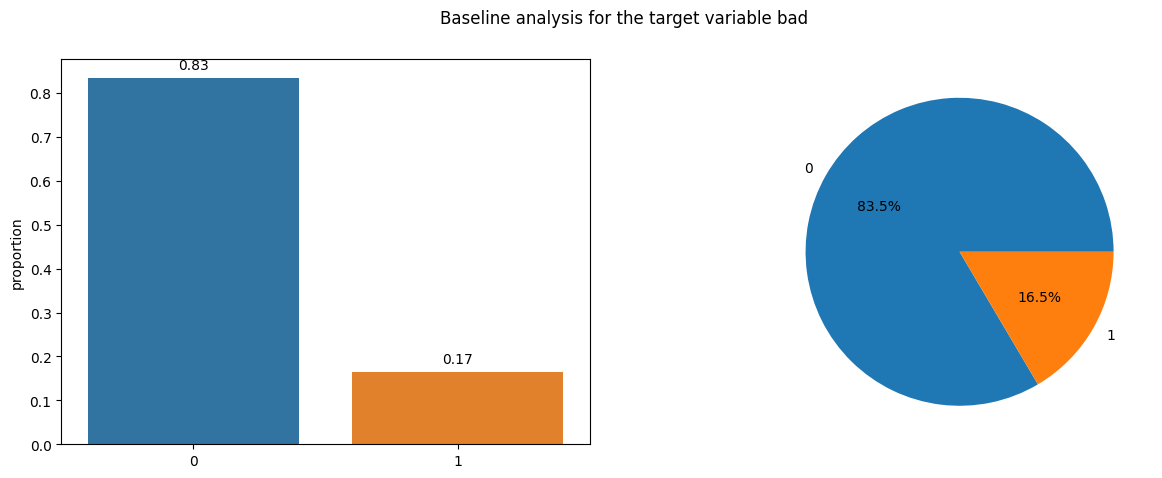

In [21]:
def baseline_analysis(df, target):
    # create a dataframe with the target variable
    df_target = df[[target]].reset_index(drop=True)
    # create a dataframe with the target variable and the number of observations
    df_target = pd.DataFrame(df_target.value_counts(normalize=True)).reset_index()

    # return the dataframe
    return df_target
#plot the baseline analysis
def plot_baseline_analysis(df, target):
    # create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    # plot the percentage of observations
    # plot a pie chart
    ax2.pie(df['proportion'], labels=df.index, autopct='%1.1f%%')

    sns.barplot(x=df.index, y='proportion', data=df, ax=ax1)
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points',
                     fontsize=10)
    fig.suptitle('Baseline analysis for the target variable ' + target)
    # show the figure
    plt.show()

df_target = baseline_analysis(train, 'bad')
plot_baseline_analysis(df_target, 'bad')

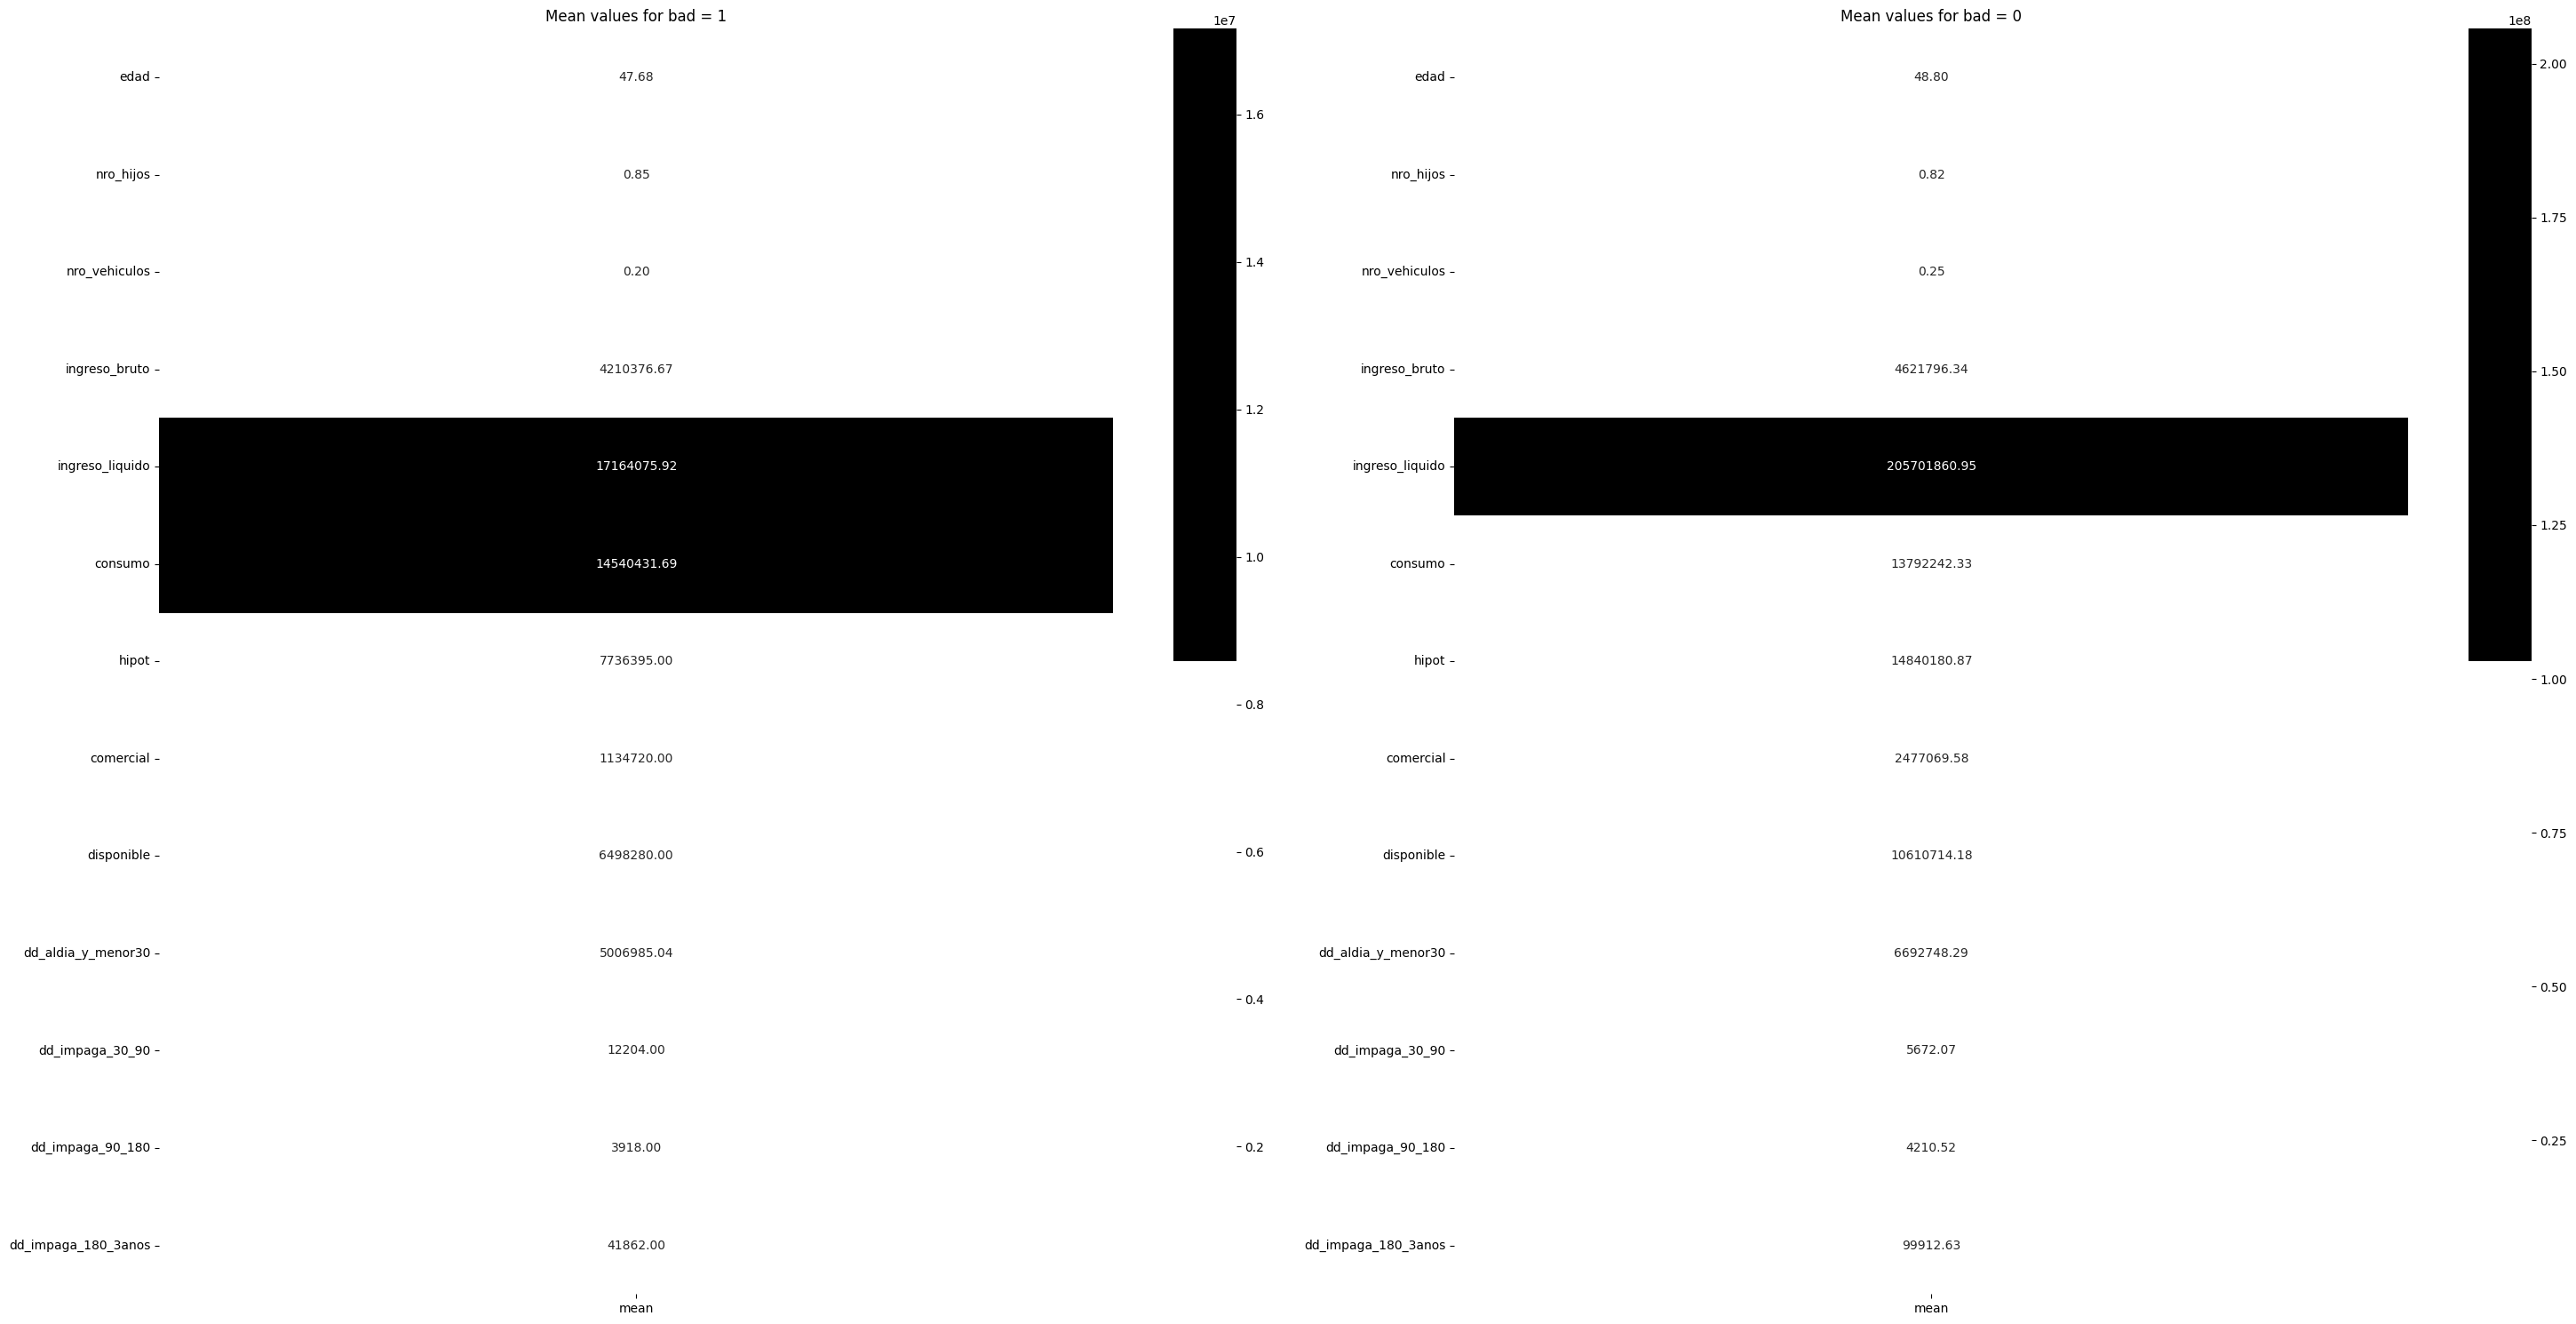

In [22]:
bad_yes = train[train['bad'] == 1].describe().T
bad_no = train[train['bad'] == 0].describe().T

colors = ['#FFFFFF','#000000']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
sns.heatmap(bad_yes[['mean']], annot=True, cmap=colors, fmt=".2f", ax=ax[0])
ax[0].set_title('Mean values for bad = 1')
sns.heatmap(bad_no[['mean']], annot=True, cmap=colors, fmt=".2f", ax=ax[1])
ax[1].set_title('Mean values for bad = 0')
fig.tight_layout()
plt.show()

### 2.2 Datos faltantes

In [23]:
# Calcular la cantidad de valores faltantes en cada columna
missing_values_count = pd.DataFrame(train.isna().sum(),columns=['missing_values'])

# Calcular la proporción de valores faltantes en cada columna
missing_values_count['proportion'] = missing_values_count.missing_values.apply(lambda x: x / len(train))

# Ordenar los valores de mayor a menor
missing_values_sorted = missing_values_count.sort_values(by='missing_values',ascending=False)

# Mostrar los resultados
print("Cantidad de registros en el conjunto de datos:", len(train))
print("\nProporción de valores faltantes por columna:")
print(missing_values_sorted)

Cantidad de registros en el conjunto de datos: 6066

Proporción de valores faltantes por columna:
                     missing_values  proportion
ingreso_bruto                     9    0.001484
bad                               7    0.001154
dd_impaga_30_90                   0    0.000000
recaudacion_origen                0    0.000000
ciclo_vida_small                  0    0.000000
tiene_propiedades                 0    0.000000
nivel_educacional                 0    0.000000
estado_civil                      0    0.000000
dd_impaga_180_3anos               0    0.000000
dd_impaga_90_180                  0    0.000000
edad                              0    0.000000
nro_hijos                         0    0.000000
disponible                        0    0.000000
comercial                         0    0.000000
hipot                             0    0.000000
consumo                           0    0.000000
ingreso_liquido                   0    0.000000
nro_vehiculos                     0   

## **3. Analisis Exploratorio de datos**


### 3.1 Analisis Univariado

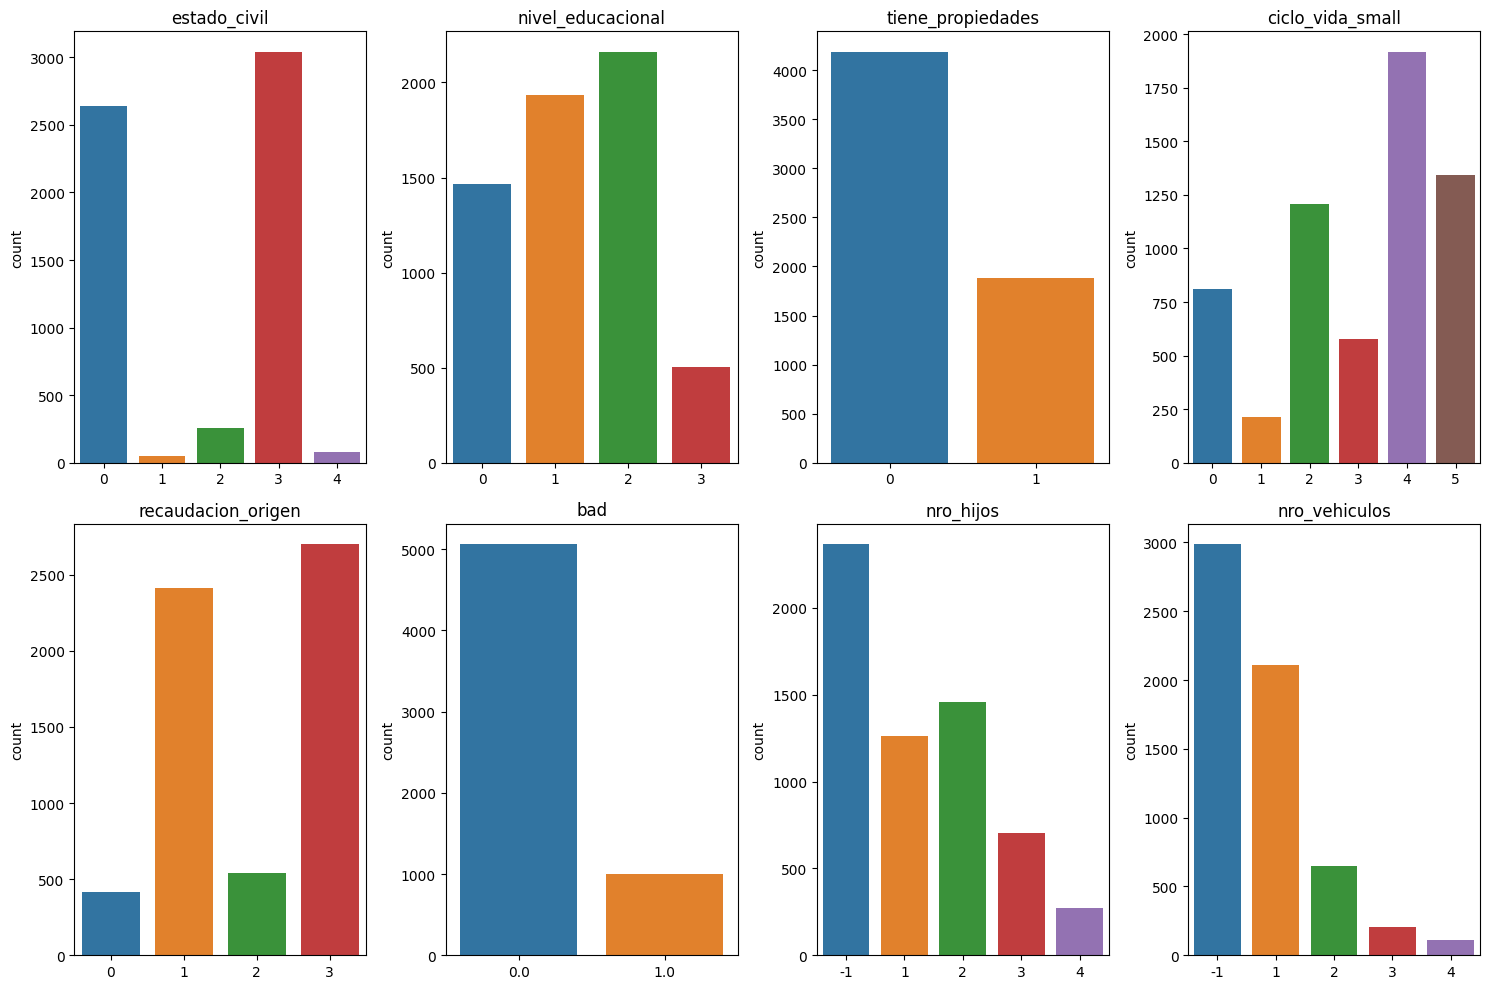

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre las columnas categóricas
for i, col in enumerate(cat_col):
    # Crear un subplot
    plt.subplot(2, 4, i+1) # Revisar de acuerdo a cantidad de columnas
    # Tramar el gráfico de barras para la columna categórica actual
    sns.countplot(data=train, x=col)
    plt.title(col)  # Establecer el título del gráfico
    plt.xlabel('')   # Eliminar el nombre del eje x para mayor claridad

# Añadir un gráfico de barras para las columnas numéricas nro_hijos y nro_vehiculos
plt.subplot(2, 4, len(cat_col) + 1)
sns.countplot(data=train, x='nro_hijos')
plt.title('nro_hijos')
plt.xlabel('')

plt.subplot(2, 4, len(cat_col) + 2)
sns.countplot(data=train, x='nro_vehiculos')
plt.title('nro_vehiculos')
plt.xlabel('')


plt.tight_layout()
plt.show()

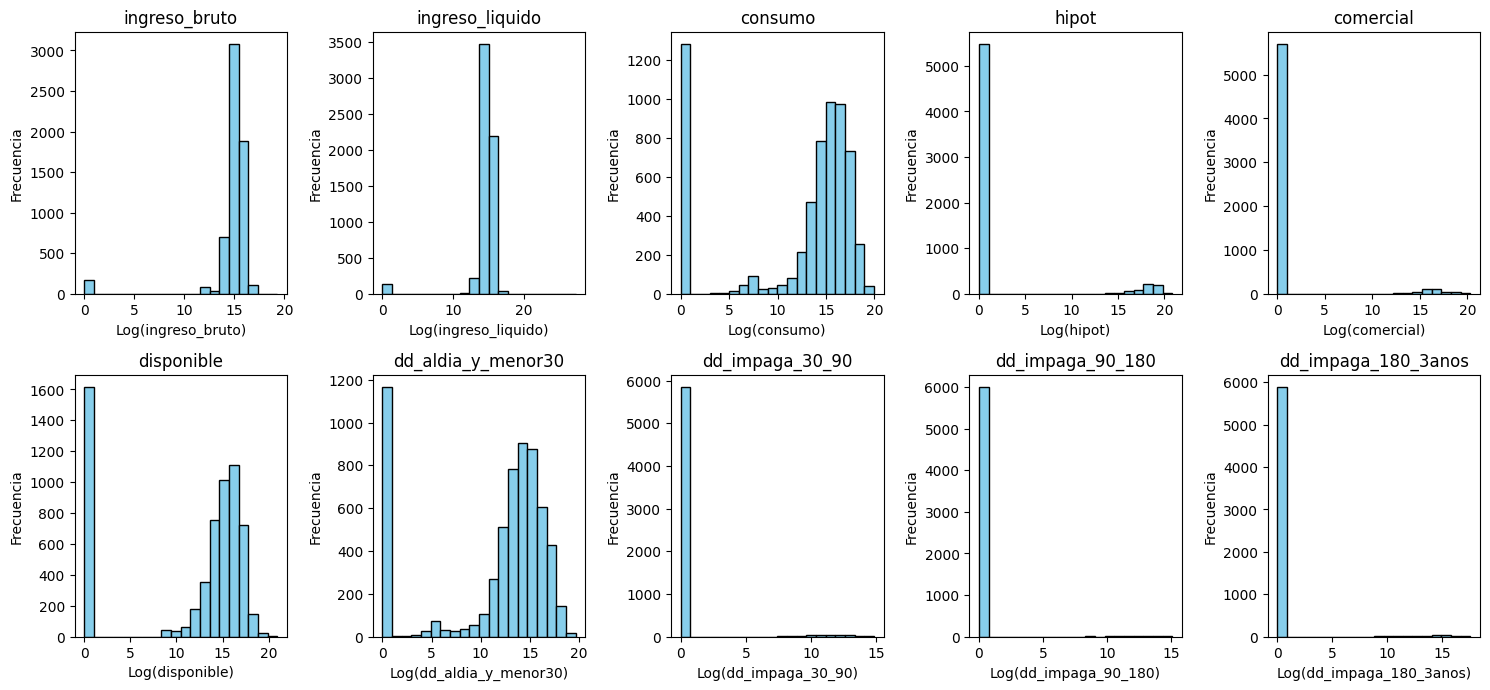

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Aplicar el logaritmo a las variables numéricas
numeric_cols = num_col[1:]
train_log = train[numeric_cols].apply(np.log1p)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre las columnas numéricas
for i, col in enumerate(numeric_cols):
    # Crear un subplot
    plt.subplot(3, 5, i+1)
    # Tramar el histograma para la columna numérica actual
    plt.hist(train_log[col], bins=20, color='skyblue', edgecolor='black')  # Ajusta los bins según sea necesario
    plt.title(col)  # Establecer el título del gráfico
    plt.xlabel('Log(' + col + ')')   # Establecer el nombre del eje x como Log(Nombre de la variable) para mayor claridad
    plt.ylabel('Frecuencia') # Añadir etiqueta al eje y

# Ajustar el diseño y el espaciado de los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

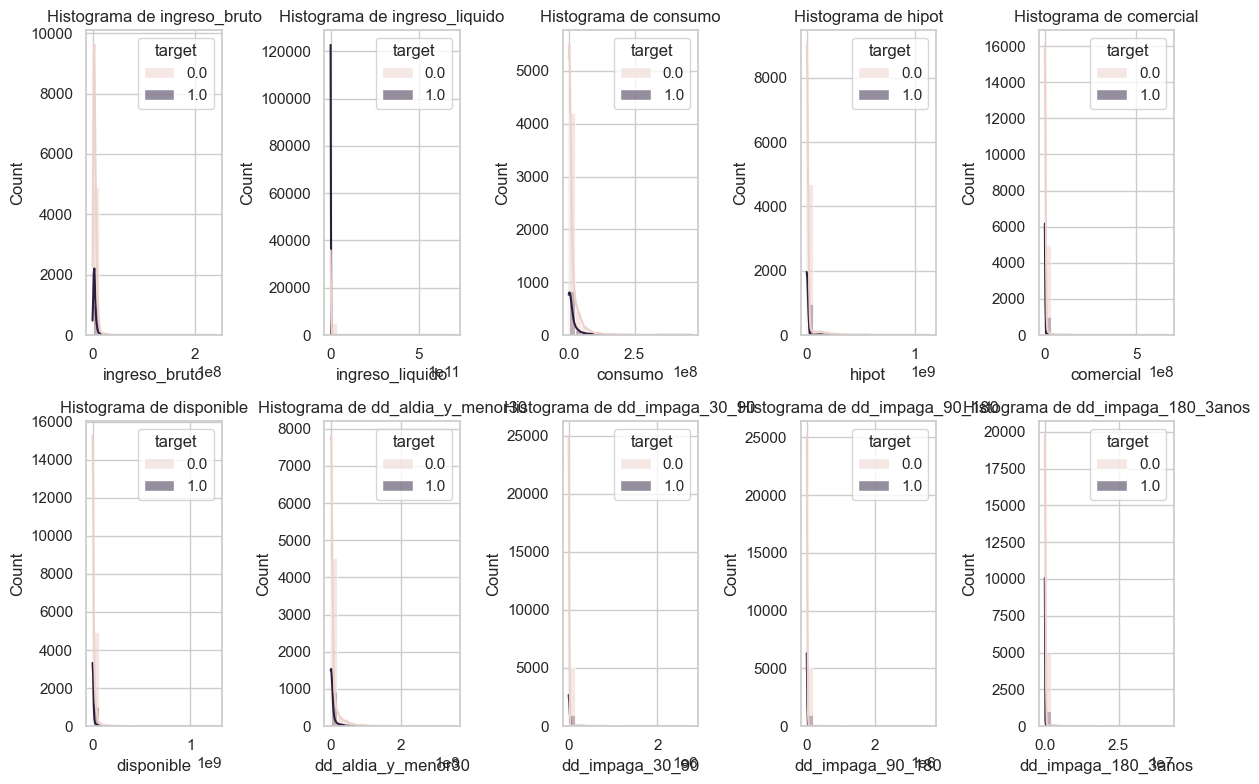

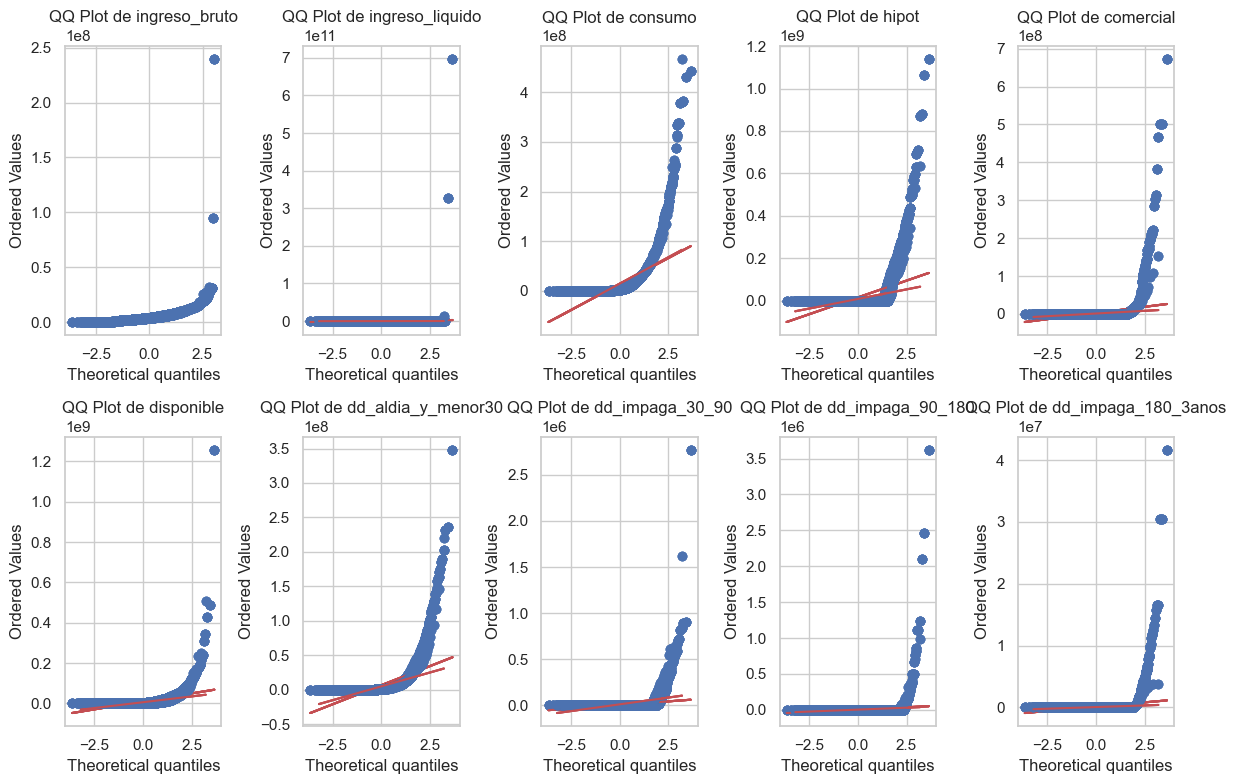

La característica ingreso_bruto para la clase 0.0 parece normal (p-value=1.0000)


ValueError: Data must be at least length 3.

In [35]:
from scipy import stats

# Cargar el conjunto de datos Iris
X = pd.DataFrame(data=train, columns=train[numeric_cols].columns)
y = pd.Series(data=train.bad, name='target')

# Concatenar características y etiquetas en un solo DataFrame
data = pd.concat([X, y], axis=1)

# Visualizar histogramas para cada característica según la clase
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    sns.histplot(data=data, x=feature, hue='target', kde=True, bins=20)
    plt.title(f'Histograma de {feature}')
plt.tight_layout()
plt.show()

# Realizar gráficos QQ para cada característica según la clase
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    for cls in np.unique(y):
        stats.probplot(X[y == cls][feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot de {feature}')
plt.tight_layout()
plt.show()

# Prueba de normalidad de Shapiro-Wilk para cada característica según la clase
for feature in X.columns:
    for cls in np.unique(y):
        stat, p_value = stats.shapiro(X[y == cls][feature])
        if p_value > 0.05:
            print(f"La característica {feature} para la clase {cls} parece normal (p-value={p_value:.4f})")
        else:
            print(f"La característica {feature} para la clase {cls} no parece normal (p-value={p_value:.4f})")

### 3.2 Analisis Bivariado

In [36]:
cat_col = cat_col.drop('bad')

<Figure size 1000x600 with 0 Axes>

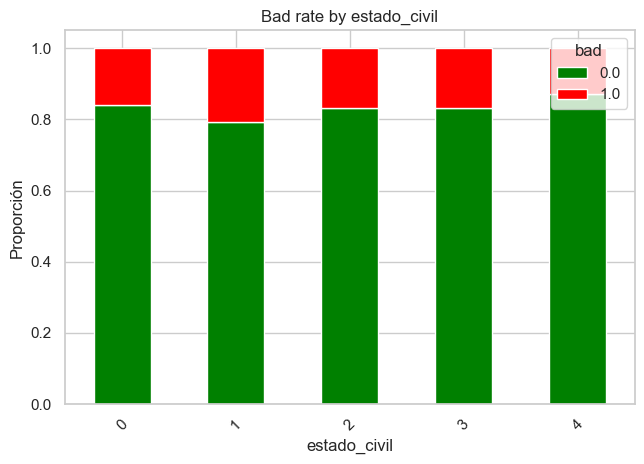

<Figure size 1000x600 with 0 Axes>

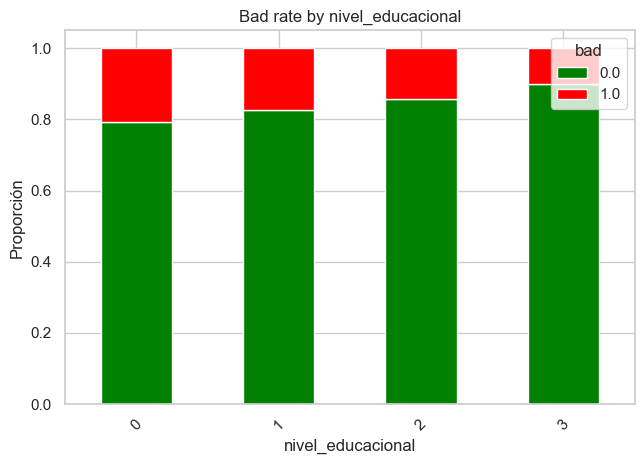

<Figure size 1000x600 with 0 Axes>

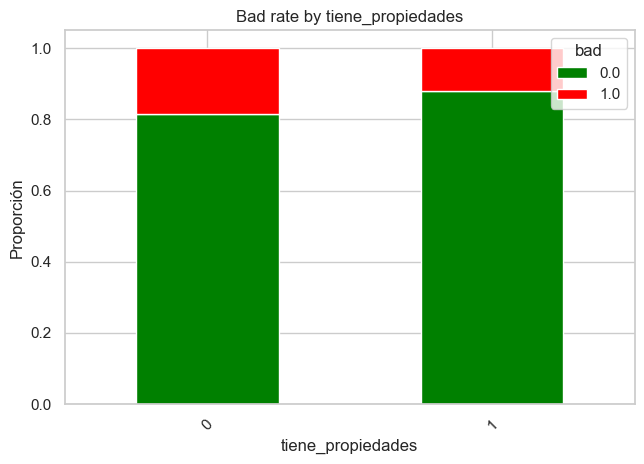

<Figure size 1000x600 with 0 Axes>

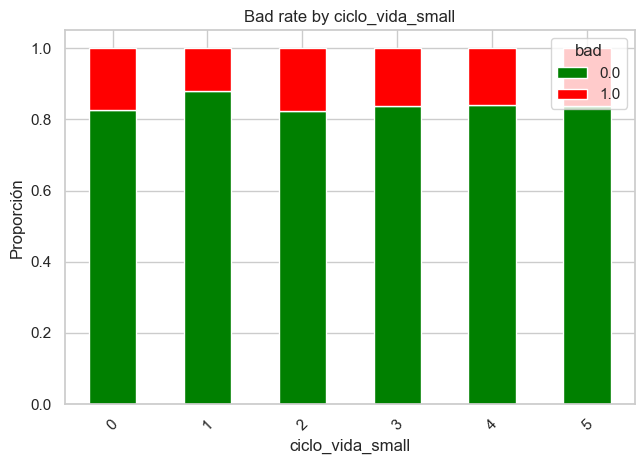

<Figure size 1000x600 with 0 Axes>

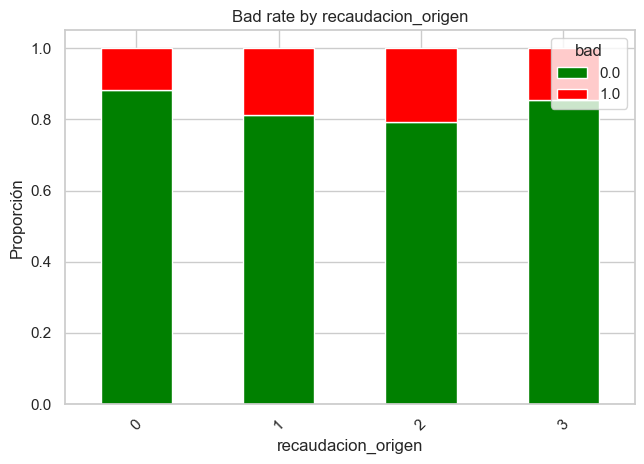

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
for col in cat_col:
    # Configurar el tamaño de la figura
    plt.figure(figsize=(10, 6))
    # create a crosstab
    crosstab = pd.crosstab(train[col], train['bad'], normalize='index')
    # plot the crosstab
    crosstab.plot(kind='bar', stacked=True, color=['green', 'red'])
    # set the title
    plt.title('Bad rate by ' + col)
    # show the plot
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
    plt.tight_layout()
    plt.legend(title='bad', loc='upper right')
    # Etiquetas y título
    plt.xlabel(col)
    plt.ylabel('Proporción')
    plt.show()


In [38]:
from scipy.stats import chi2_contingency

# Calcular la prueba chi-cuadrado para cada variable categórica
for column in cat_col:
    contingency_table = pd.crosstab(train[column], train['bad'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    print(f"Variable: {column}")
    print(f"Chi-squared statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print("-----------------------------")

Variable: estado_civil
Chi-squared statistic: 2.1116226323565734
P-value: 0.7152374131186434
-----------------------------
Variable: nivel_educacional
Chi-squared statistic: 43.421549424196314
P-value: 2.0026278333100577e-09
-----------------------------
Variable: tiene_propiedades
Chi-squared statistic: 37.29050782955646
P-value: 1.0177878756867204e-09
-----------------------------
Variable: ciclo_vida_small
Chi-squared statistic: 5.1124315932052005
P-value: 0.40231367188737305
-----------------------------
Variable: recaudacion_origen
Chi-squared statistic: 29.690536591414325
P-value: 1.603179391992107e-06
-----------------------------


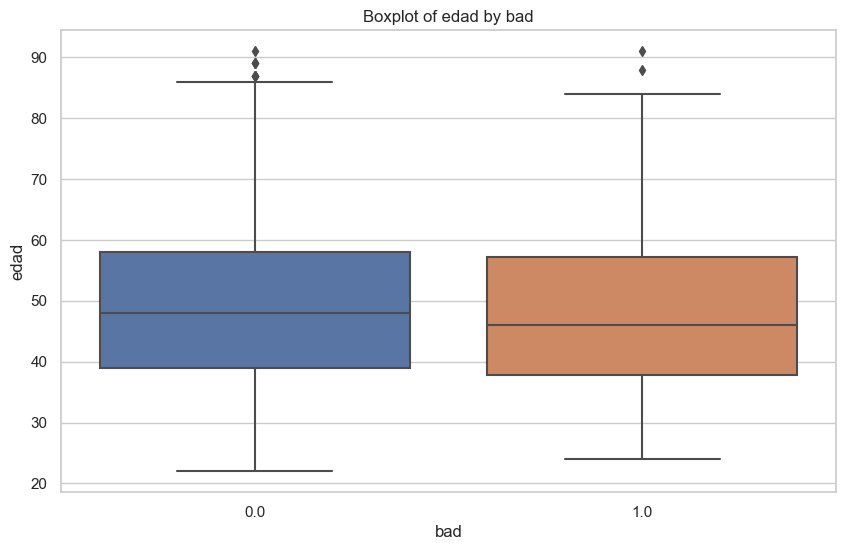

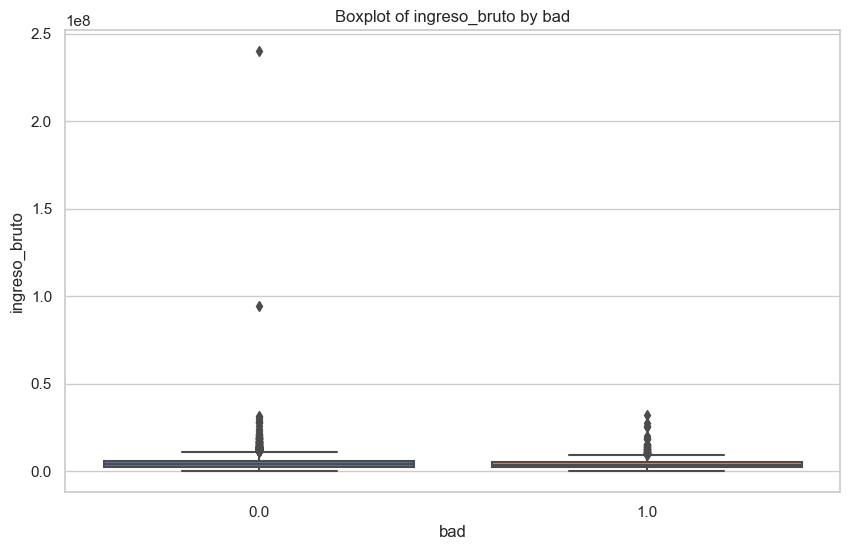

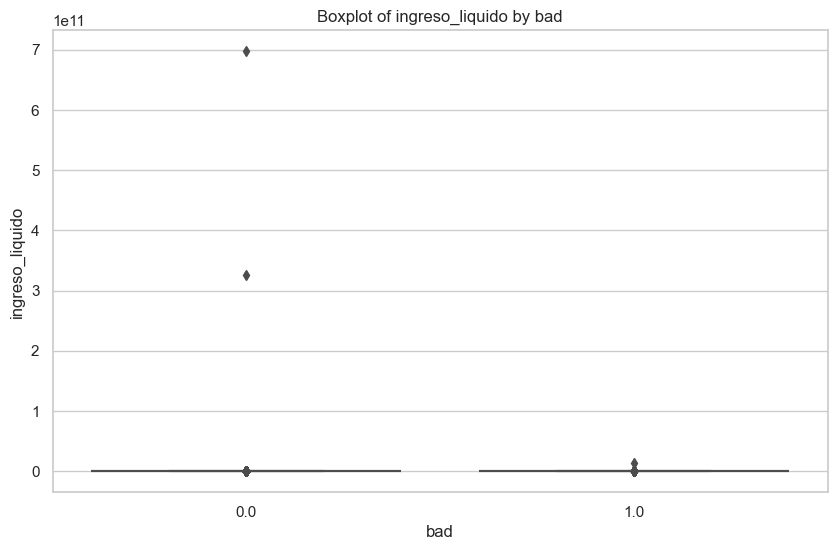

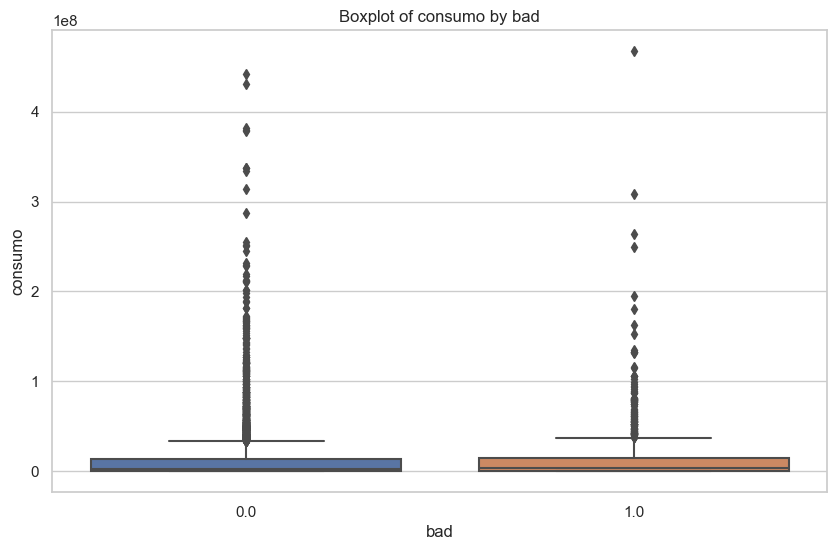

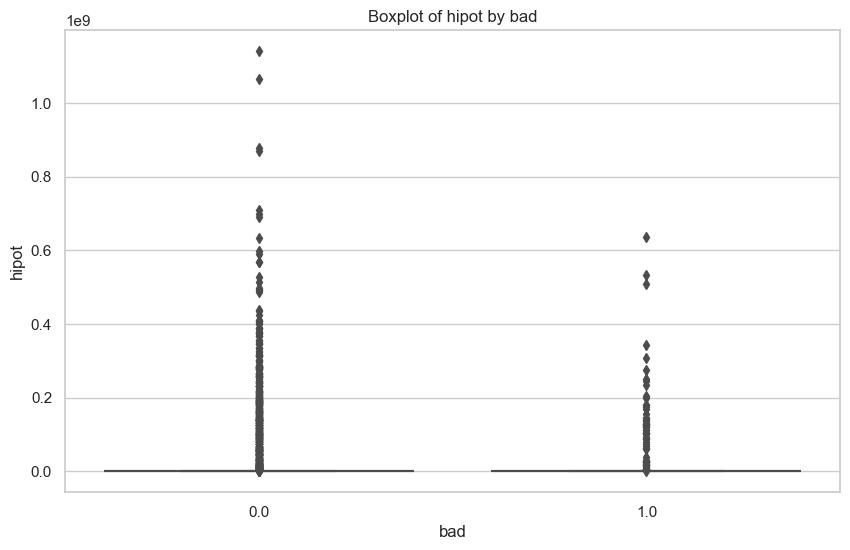

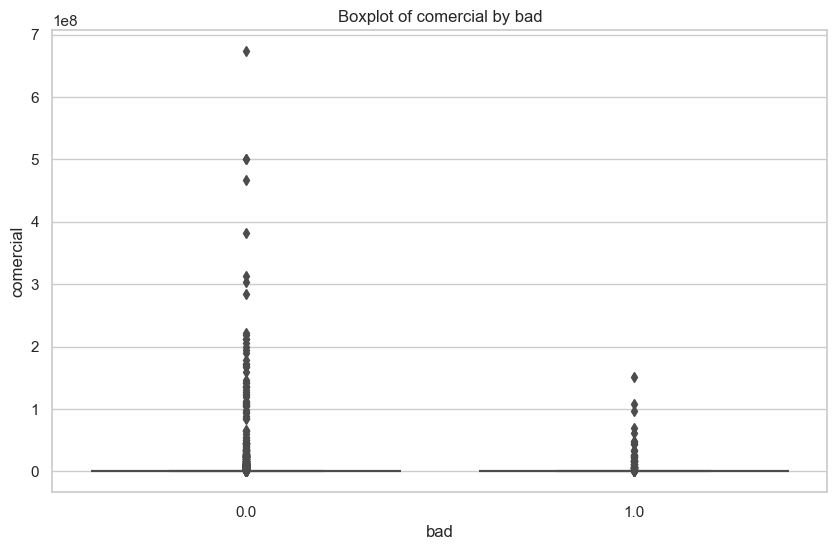

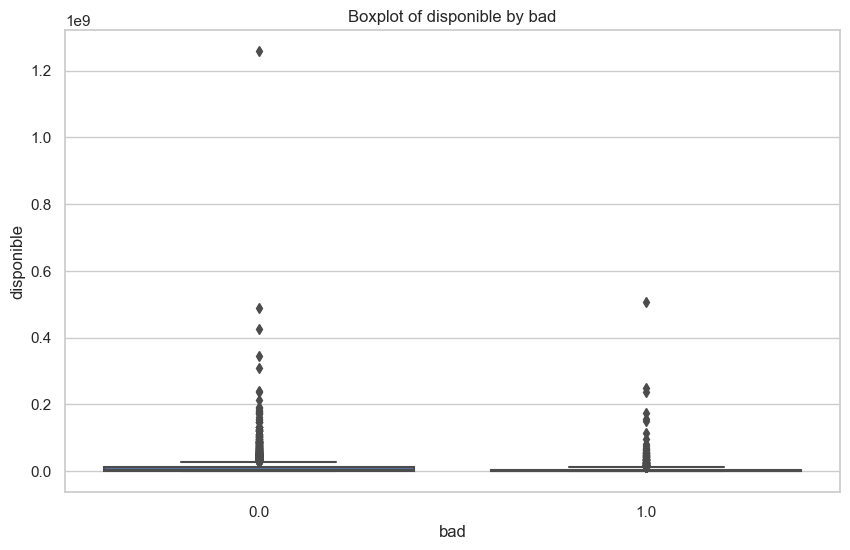

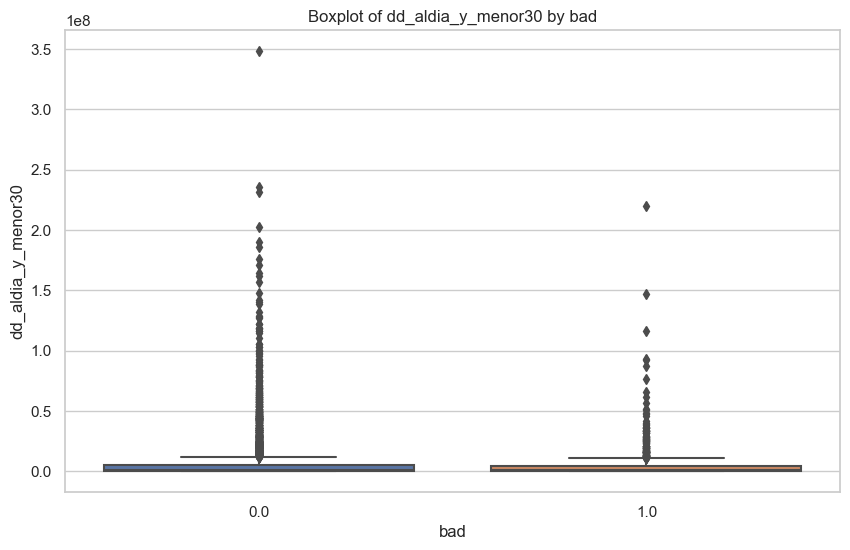

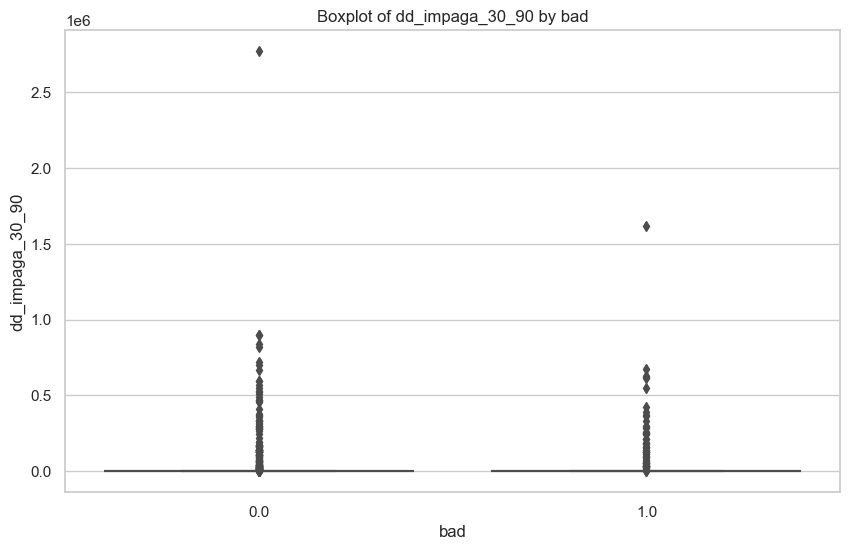

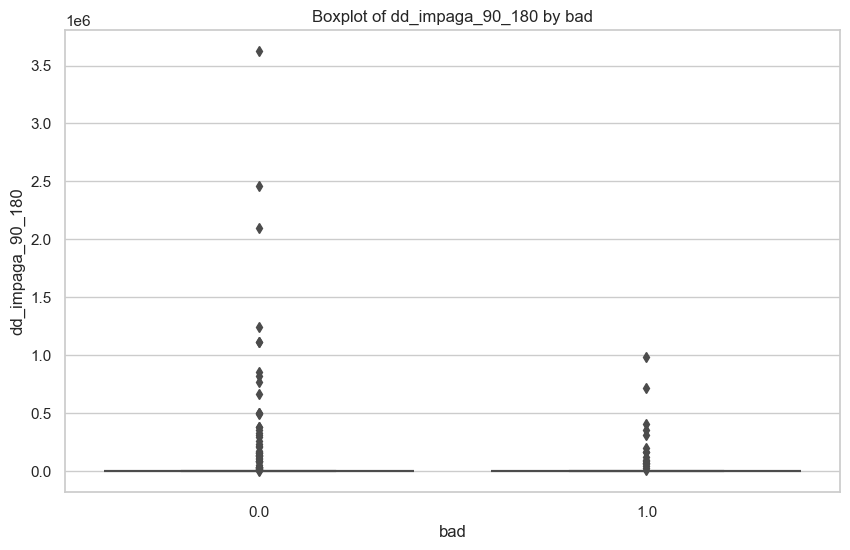

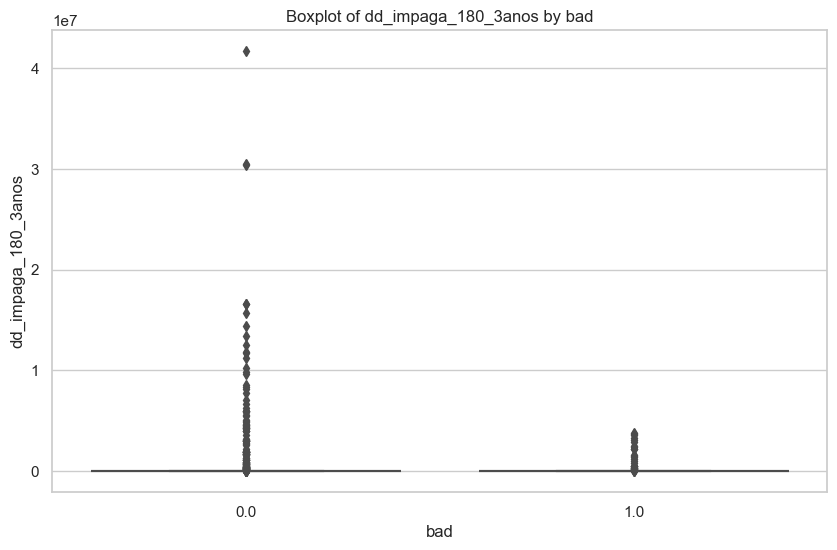

In [39]:
# do a boxplot, and scatter for each numerical variable in the dataset against the target variable
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='bad', y=col, data=train)
    plt.title('Boxplot of ' + col + ' by bad')
    plt.show()

Text(0.5, 1.0, 'Anova Score with the target variable')

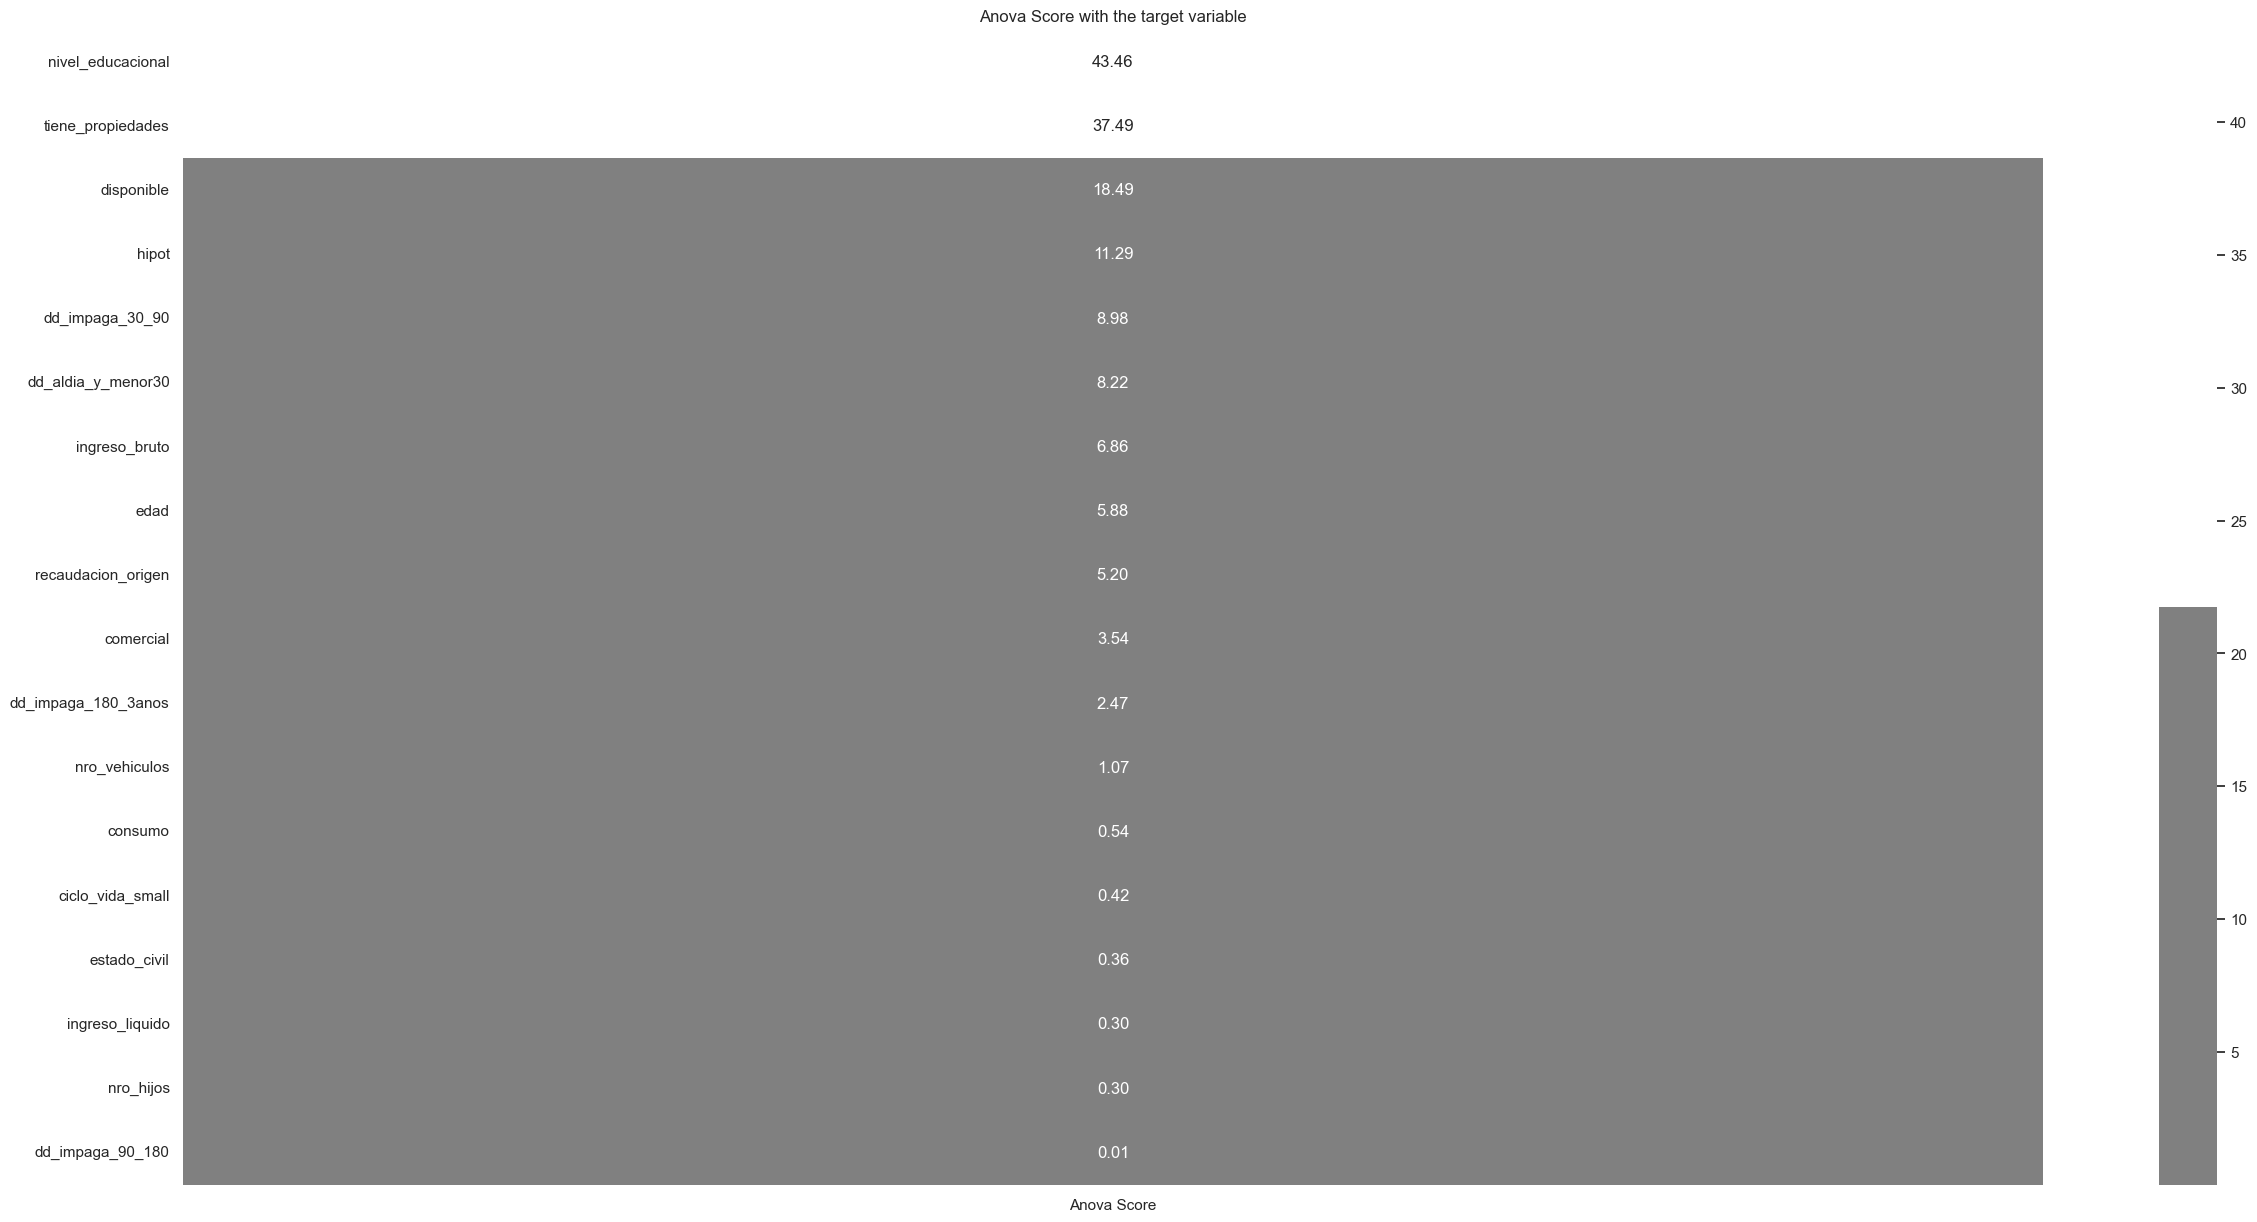

In [41]:
df = train.dropna()
features = df.drop('bad', axis=1)
target = df['bad']
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)
featuressocre = pd.DataFrame(fit.scores_,index=list(features.columns),columns=['Anova Score'])
featuressocre = featuressocre.sort_values(by='Anova Score',ascending=False)

fig, ax = plt.subplots(1,1, figsize=(30, 15))
sns.heatmap(featuressocre, annot=True, cmap=['grey','white'], fmt=".2f",cbar = True, ax=ax)
plt.title('Anova Score with the target variable')

In [42]:
from scipy.stats import ttest_ind

# Calcular la prueba t para cada variable numérica
for column in num_col:
    bad_group = train[train['bad'] == 1][column]
    good_group = train[train['bad'] == 0][column]

    t_stat, p_value = ttest_ind(bad_group, good_group, equal_var=False)

    print(f"Variable: {column}")
    print(f"t-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print("-----------------------------")

Variable: edad
t-statistic: -2.488356911295382
P-value: 0.012946711315894728
-----------------------------
Variable: ingreso_bruto
t-statistic: nan
P-value: nan
-----------------------------
Variable: ingreso_liquido
t-statistic: -1.2330864474847802
P-value: 0.21759984769396656
-----------------------------
Variable: consumo
t-statistic: 0.6967670419301655
P-value: 0.48606344850110117
-----------------------------
Variable: hipot
t-statistic: -4.313698548061828
P-value: 1.685970360873614e-05
-----------------------------
Variable: comercial
t-statistic: -3.2913499749177637
P-value: 0.001005347367768593
-----------------------------
Variable: disponible
t-statistic: -4.850530946898407
P-value: 1.3499079450870236e-06
-----------------------------
Variable: dd_aldia_y_menor30
t-statistic: -3.4799264246236064
P-value: 0.0005136949678718121
-----------------------------
Variable: dd_impaga_30_90
t-statistic: 2.497811040100451
P-value: 0.012624827340629677
-----------------------------
Varia

### 3.3 Otros

In [43]:
for var in train.select_dtypes(include=['object']).columns:
    cantidad = train[var].unique()
    print(f"Existen {cantidad} valores en {var} Unicos")

Existen [0 3 2 1 4] valores en estado_civil Unicos
Existen [0 2 1 3] valores en nivel_educacional Unicos
Existen [0 1] valores en tiene_propiedades Unicos
Existen [2 4 3 5 0 1] valores en ciclo_vida_small Unicos
Existen [1 3 2 0] valores en recaudacion_origen Unicos
Existen [1.0 0.0 nan] valores en bad Unicos


In [44]:
train['edad'].describe()

count    6066.000000
mean       48.610122
std        13.018719
min        22.000000
25%        39.000000
50%        47.000000
75%        58.000000
max        91.000000
Name: edad, dtype: float64

## **4. Outliers, missing y correlaciones**

### 4.1 Outliers

In [45]:
import pandas as pd

# Seleccionar solo las columnas numéricas continuas
X = train

# Definir un umbral para identificar outliers
threshold = 1.5  # Puedes ajustar este valor según sea necesario

# Inicializar un diccionario para almacenar los resultados
outliers_info = {}

# Iterar sobre cada columna
for col in X.columns:
    # Calcular el rango intercuartil (IQR) para la variable actual
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identificar outliers para la variable actual
    outliers_mask = (X[col] < (Q1 - threshold * IQR)) | (X[col] > (Q3 + threshold * IQR))
    outliers_df = X[outliers_mask]

    # Calcular la cantidad de outliers y su proporción respecto al total
    num_outliers = len(outliers_df)
    total_records = len(train)
    proportion = num_outliers / total_records

    # Almacenar la información en el diccionario
    outliers_info[col] = {'num_outliers': num_outliers, 'proportion': proportion}

# Mostrar resultados
for col, info in outliers_info.items():
    print(f"Columna: {col}")
    print(f"Cantidad de outliers: {info['num_outliers']}")
    print(f"Proporción respecto al total: {info['proportion']:.2%}\n")

Columna: edad
Cantidad de outliers: 10
Proporción respecto al total: 0.16%

Columna: nro_hijos
Cantidad de outliers: 0
Proporción respecto al total: 0.00%

Columna: nro_vehiculos
Cantidad de outliers: 0
Proporción respecto al total: 0.00%

Columna: ingreso_bruto
Cantidad de outliers: 239
Proporción respecto al total: 3.94%

Columna: ingreso_liquido
Cantidad de outliers: 276
Proporción respecto al total: 4.55%

Columna: consumo
Cantidad de outliers: 714
Proporción respecto al total: 11.77%

Columna: hipot
Cantidad de outliers: 592
Proporción respecto al total: 9.76%

Columna: comercial
Cantidad de outliers: 374
Proporción respecto al total: 6.17%

Columna: disponible
Cantidad de outliers: 624
Proporción respecto al total: 10.29%

Columna: dd_aldia_y_menor30
Cantidad de outliers: 811
Proporción respecto al total: 13.37%

Columna: dd_impaga_30_90
Cantidad de outliers: 216
Proporción respecto al total: 3.56%

Columna: dd_impaga_90_180
Cantidad de outliers: 64
Proporción respecto al total: 

In [46]:
from sklearn.neighbors import LocalOutlierFactor

# Seleccionar solo las columnas numéricas continuas
X = train[num_col].dropna()

# Ajustar el modelo LOF
lof = LocalOutlierFactor( p=1)  # Define el porcentaje esperado de outliers
y_pred = lof.fit_predict(X)

# Identificar los outliers (etiqueta -1)
outliers = X[y_pred == -1]

outliers

,edad,ingreso_bruto,ingreso_liquido,consumo,hipot,comercial,disponible,dd_aldia_y_menor30,dd_impaga_30_90,dd_impaga_90_180,dd_impaga_180_3anos
id_cliente,,,,,,,,,,,
764954,38.0,9417040.0,5474000.0,731865.0,0.0,0.0,1870000.0,146373.0,0.0,0.0,0.0
440530,64.0,819430.0,489200.0,0.0,0.0,1390000.0,0.0,278000.0,0.0,0.0,0.0
1100371,40.0,2250000.0,2000000.0,0.0,0.0,1540000.0,2000000.0,308000.0,0.0,0.0,0.0
429766,50.0,2817095.0,1349110.0,34430000.0,0.0,0.0,3995000.0,1402000.0,0.0,0.0,5484000.0
1667133,44.0,3861780.0,2100335.0,860585.0,0.0,0.0,125000.0,172117.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
278428,38.0,4760505.0,1613585.0,190000.0,0.0,0.0,0.0,38000.0,0.0,0.0,0.0
1471525,54.0,19719815.0,14751640.0,38065000.0,0.0,0.0,5405000.0,7613000.0,0.0,0.0,0.0
474273,33.0,2250000.0,2050000.0,920000.0,0.0,5900000.0,6690000.0,1364000.0,0.0,0.0,0.0


In [47]:
from sklearn.ensemble import IsolationForest

# Seleccionar solo las columnas numéricas continuas
X = train[num_col].dropna()

# Ajustar el modelo Isolation Forest
isolation_forest = IsolationForest(bootstrap=True)  # Define el porcentaje esperado de outliers
isolation_forest.fit(X)

# Identificar outliers
outliers = X[isolation_forest.predict(X) == -1]
outliers

,edad,ingreso_bruto,ingreso_liquido,consumo,hipot,comercial,disponible,dd_aldia_y_menor30,dd_impaga_30_90,dd_impaga_90_180,dd_impaga_180_3anos
id_cliente,,,,,,,,,,,
1159285,44.0,5511175.0,3216180.0,18660000.0,238970000.0,0.0,87055000.0,51526000.0,0.0,0.0,0.0
285487,46.0,5955255.0,3188360.0,62705000.0,0.0,0.0,535000.0,847000.0,0.0,0.0,11694000.0
1112816,39.0,10204740.0,5162480.0,167610000.0,0.0,8925000.0,7330000.0,62871000.0,0.0,0.0,0.0
1066893,59.0,16050040.0,9412540.0,121855000.0,0.0,0.0,3000000.0,24371000.0,0.0,0.0,0.0
1666200,30.0,10047670.0,7956415.0,15025000.0,0.0,50245000.0,0.0,13054000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1471525,54.0,19719815.0,14751640.0,38065000.0,0.0,0.0,5405000.0,7613000.0,0.0,0.0,0.0
631560,34.0,3636765.0,1401660.0,29675000.0,0.0,0.0,0.0,3967000.0,188000.0,411000.0,1387000.0
707270,36.0,6963755.0,4403935.0,13835000.0,0.0,151840000.0,6260000.0,33135000.0,0.0,0.0,0.0


### 4.2 Missing

<Axes: >

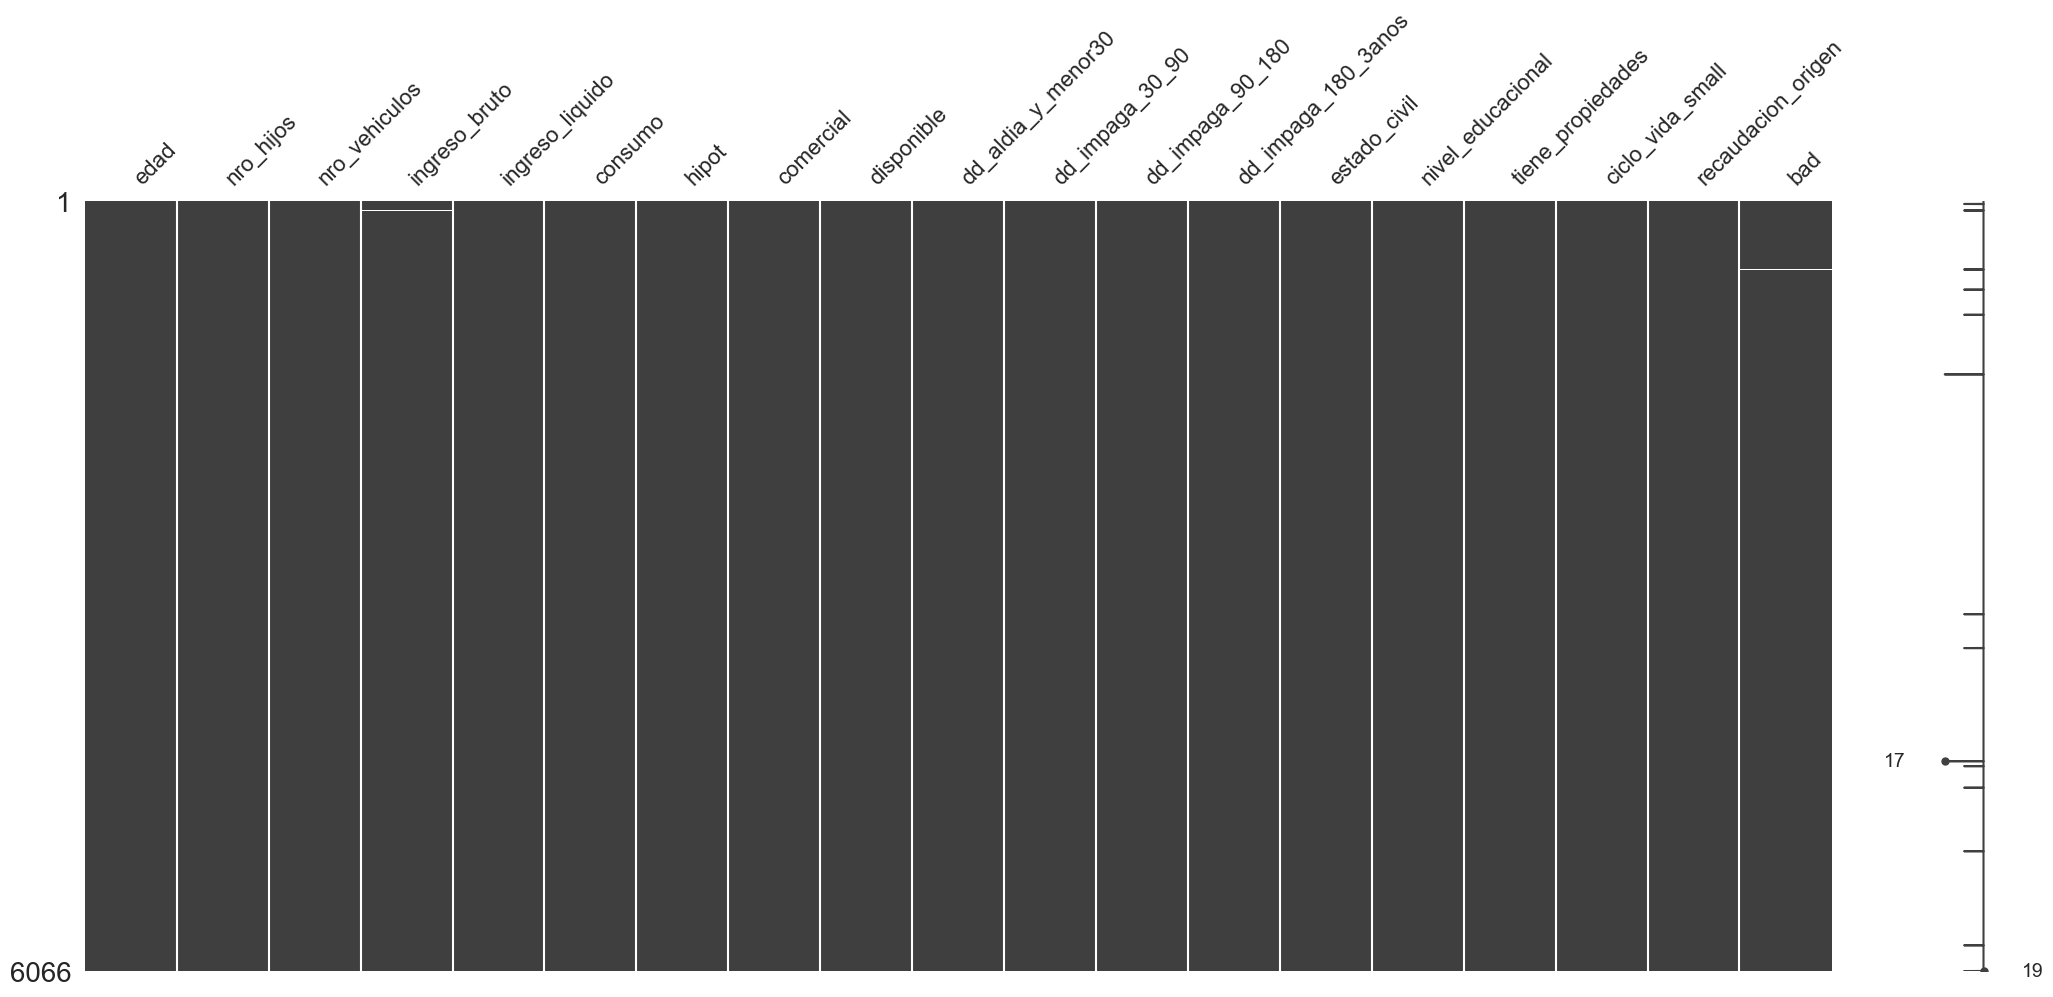

In [48]:
import missingno as msno
msno.matrix(train)

In [49]:
unique_values = train.nunique().sort_values(ascending=False)
unique_values = pd.DataFrame(unique_values, columns=["Unique values"])
unique_values["Missing values"] = train.isna().mean().sort_values(ascending=False)
unique_values["Missing values"] = unique_values["Missing values"].apply(lambda x: f"{x:.2%}")
unique_values

,Unique values,Missing values
ingreso_liquido,5332,0.00%
ingreso_bruto,5280,0.15%
dd_aldia_y_menor30,3703,0.00%
consumo,3375,0.00%
disponible,2714,0.00%
hipot,591,0.00%
comercial,361,0.00%
dd_impaga_180_3anos,172,0.00%
dd_impaga_30_90,154,0.00%
edad,69,0.00%


### 4.3 Correlaciones

Text(0.5, 1.0, 'Correlation with the target variable')

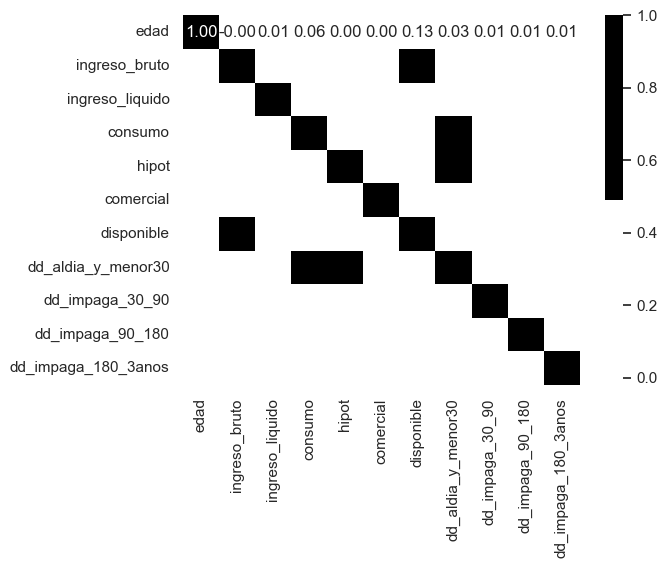

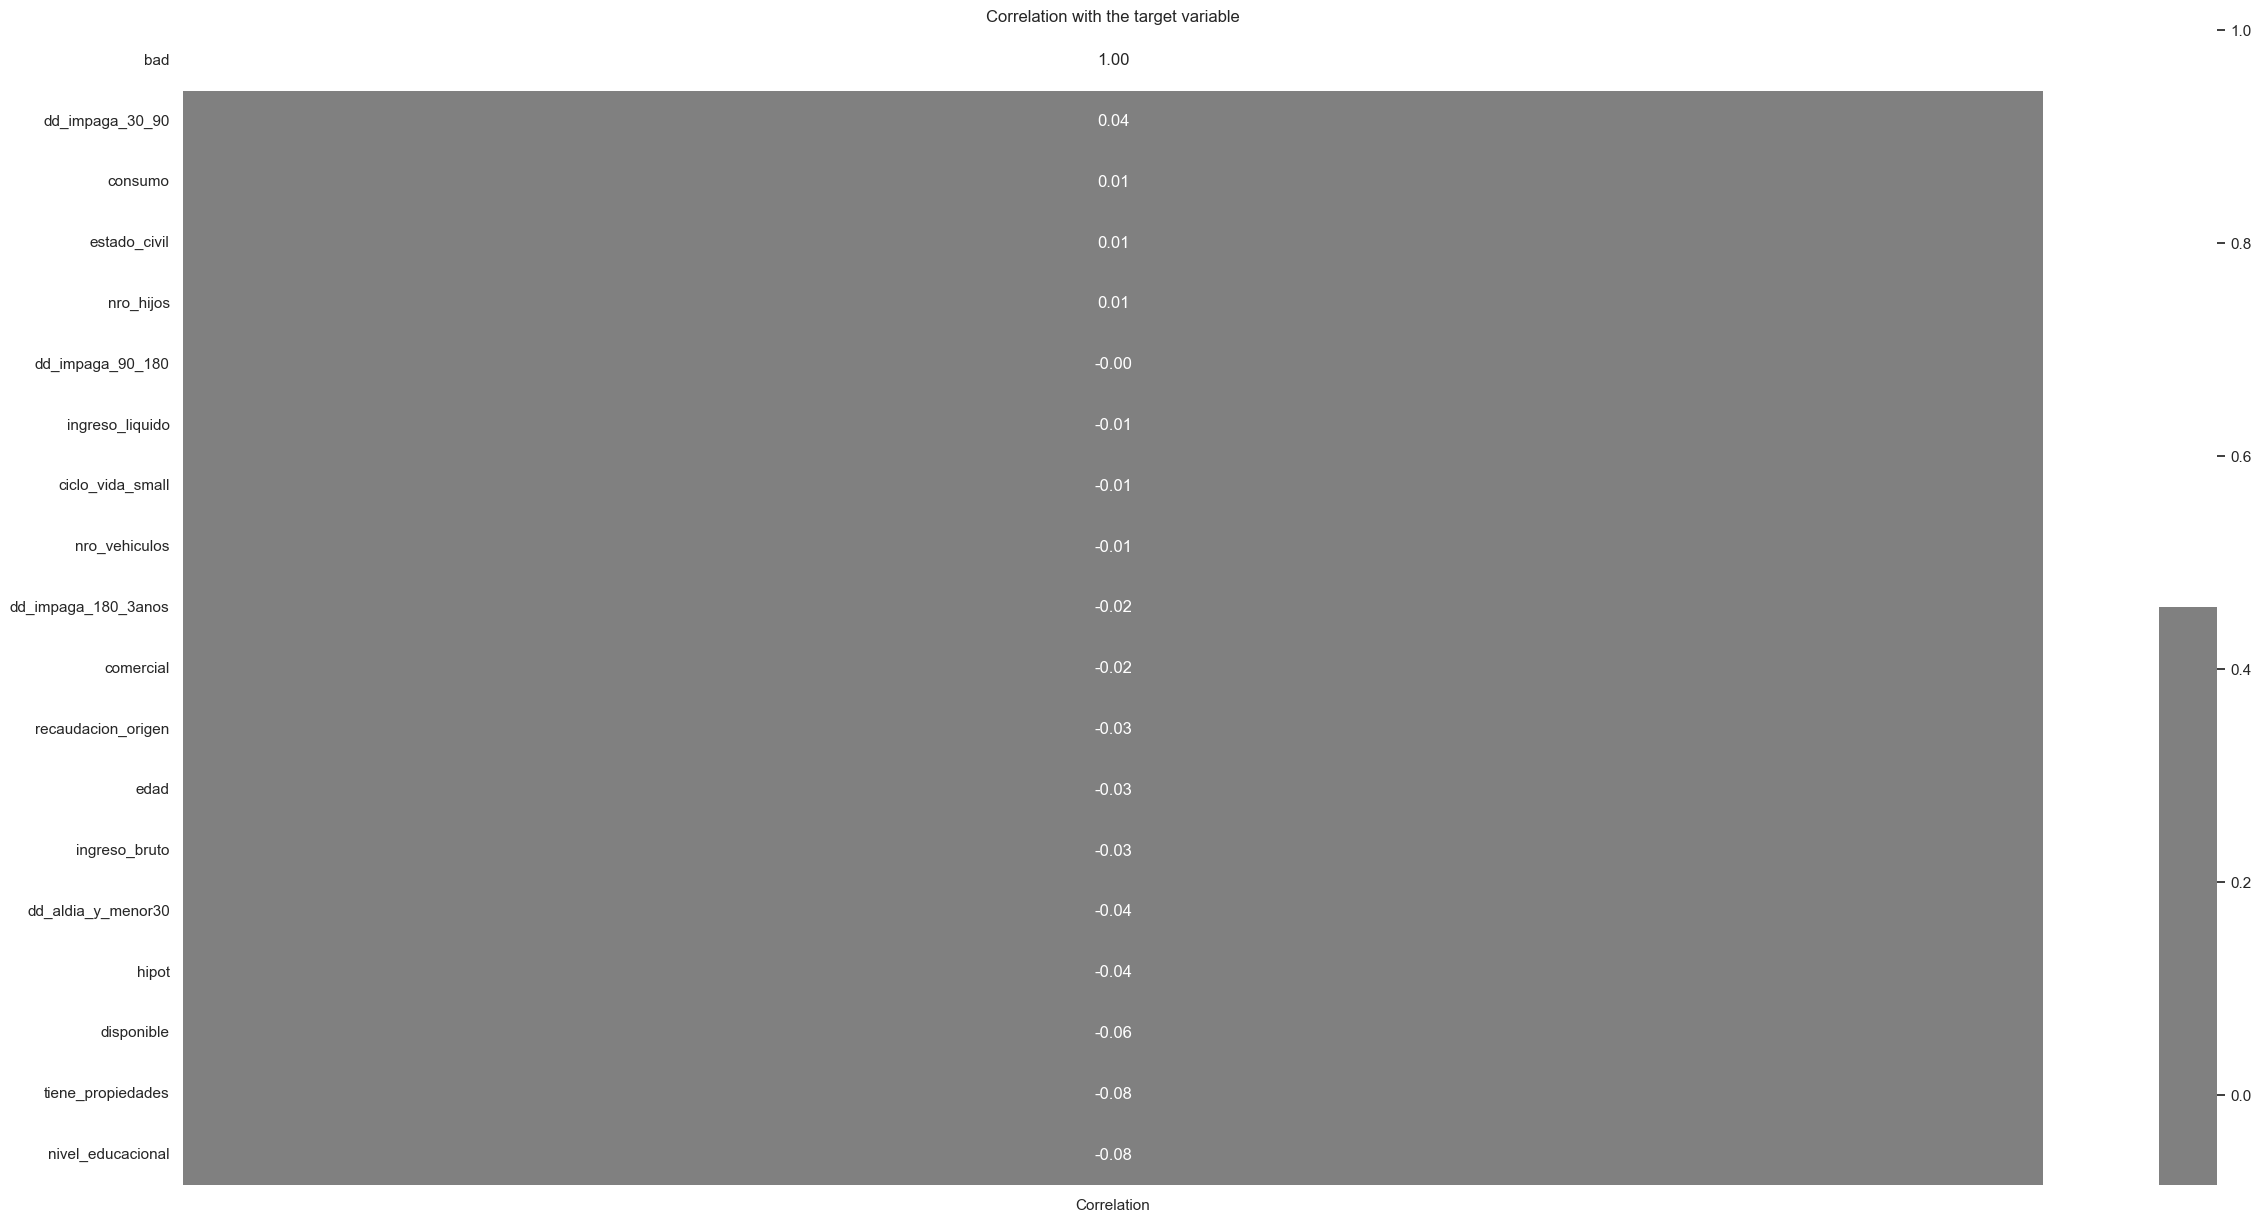

In [50]:
sns.heatmap(train[num_col].corr(), annot=True, cmap=colors, fmt=".2f", cbar=True)
corr = train.corrwith(train['bad']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']
fig, ax = plt.subplots(1, 1, figsize=(30, 15))

sns.heatmap(corr, annot=True, cmap=['grey', 'white'], fmt=".2f", cbar=True, ax=ax)
plt.title('Correlation with the target variable')

## **5. Transformación y selección de variables**

In [84]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Assuming train is your DataFrame containing both features and target variable
train_df = train.dropna()
train_df['bad'] = train_df['bad'].astype('int')

# Splitting the data into features and target variable
x = train_df.drop('bad', axis=1)
y = train_df['bad']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [85]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.2)


steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(train_df, train_df['bad'])
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

## **6. Definiciones de Negocio**

## **7. Modelación**

In [80]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
def plot_roc_curve(classifier, x_test, y_test):
    y_score = classifier.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


def model(classifier,x_train,y_train,x_test,y_test,modelo,data):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    cv_mean = cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()
    cv_std = cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').std()
    roc_auc = roc_auc_score(y_test,prediction)
    accuracy = accuracy_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    print("Cross Validation Score : ",'{0:.2%}'.format(cv_mean))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    results = pd.DataFrame({'Modelo': modelo,'Accuracy': accuracy,'Recall': recall,'Precision': precision,'ROC_AUC': roc_auc,'data':data}, index = [0])
    print(results)
    return results

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [81]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2',solver = 'liblinear')

Cross Validation Score :  59.77%
ROC_AUC Score :  50.76%


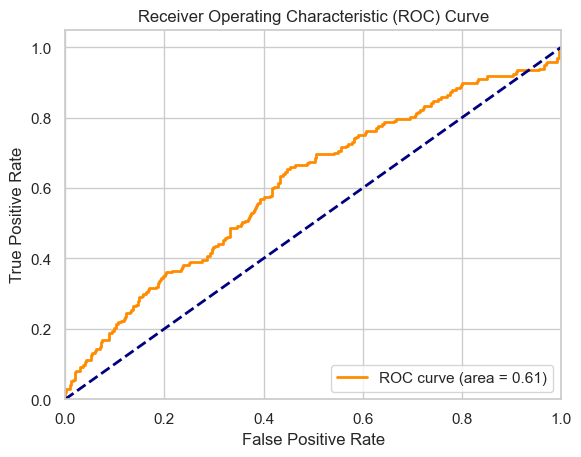

                Modelo  Accuracy    Recall  Precision   ROC_AUC       data
0  Logistic Regression  0.839802  0.015228        1.0  0.507614  SIN SMOTE
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1014
           1       1.00      0.02      0.03       197

    accuracy                           0.84      1211
   macro avg       0.92      0.51      0.47      1211
weighted avg       0.87      0.84      0.77      1211


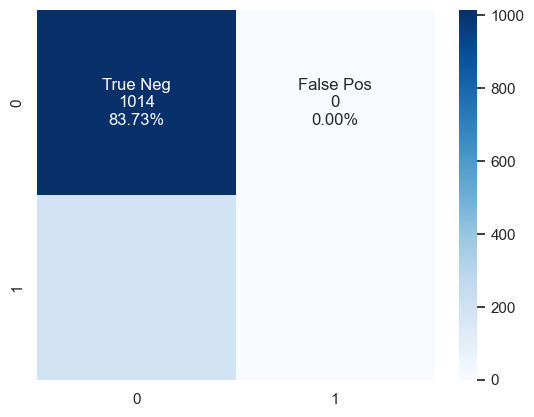

In [86]:
lgr_results =model(classifier_lr,X_train,Y_train,X_test,Y_test,'Logistic Regression', 'SIN SMOTE')
model_evaluation(classifier_lr,X_test,Y_test)

Cross Validation Score :  61.45%
ROC_AUC Score :  50.30%


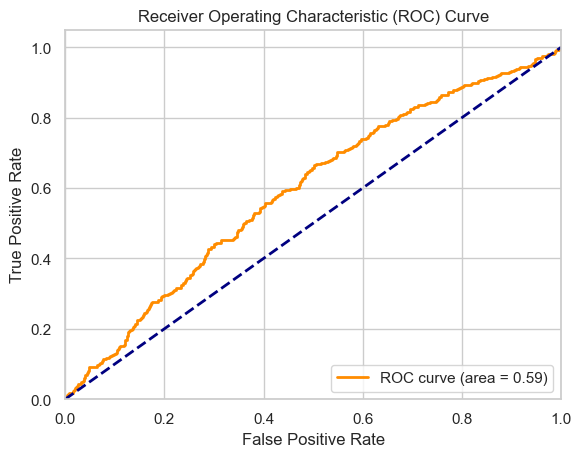

                Modelo  Accuracy    Recall  Precision  ROC_AUC   data
0  Logistic Regression  0.665331  0.018072   0.428571  0.50303  SMOTE
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       999
           1       0.43      0.02      0.03       498

    accuracy                           0.67      1497
   macro avg       0.55      0.50      0.42      1497
weighted avg       0.59      0.67      0.54      1497


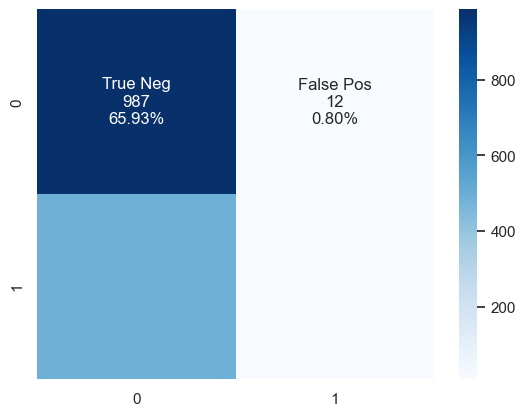

In [89]:
lgr_results_Smote =model(classifier_lr,x_train2,y_train2,x_test2,y_test2,'Logistic Regression', 'SMOTE')
model_evaluation(classifier_lr,x_test2,y_test2)

In [91]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',C = 0.1)

In [ ]:
svc_results= model(classifier_svc,X_train,Y_train,X_test,Y_test,'Logistic Regression', 'SIN SMOTE')
model_evaluation(classifier_lr,X_test,Y_test)

### 7.1 Modelo(s)

### 7.2 Comparativo

### 7.3 Performance

## **8. Conclusiones**